In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("auto-mpg.csv", header=None)

In [3]:
df.columns = ['mpg', 'cylinders', 'displacement', 'HP', 'weight', 'acceleraton', 'model_yr', 'origin', 'name']

In [4]:
print(df.head())

    mpg  cylinders  displacement     HP  weight  acceleraton  model_yr  \
0  18.0          8         307.0  130.0  3504.0         12.0        70   
1  15.0          8         350.0  165.0  3693.0         11.5        70   
2  18.0          8         318.0  150.0  3436.0         11.0        70   
3  16.0          8         304.0  150.0  3433.0         12.0        70   
4  17.0          8         302.0  140.0  3449.0         10.5        70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   HP            398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleraton   398 non-null    float64
 6   model_yr      398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleraton,model_yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.HP.replace('?', np.nan, inplace = True)
df.dropna(subset = ['HP'], axis = 0, inplace = True)
df.HP = df.HP.astype('float')

In [8]:
ndf = df[['mpg', 'cylinders', 'HP', 'weight']]

<AxesSubplot:xlabel='weight', ylabel='mpg'>

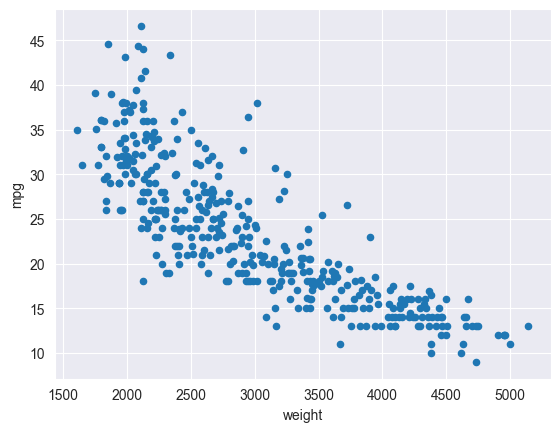

In [9]:
ndf.plot(kind = 'scatter', x = 'weight', y = 'mpg')

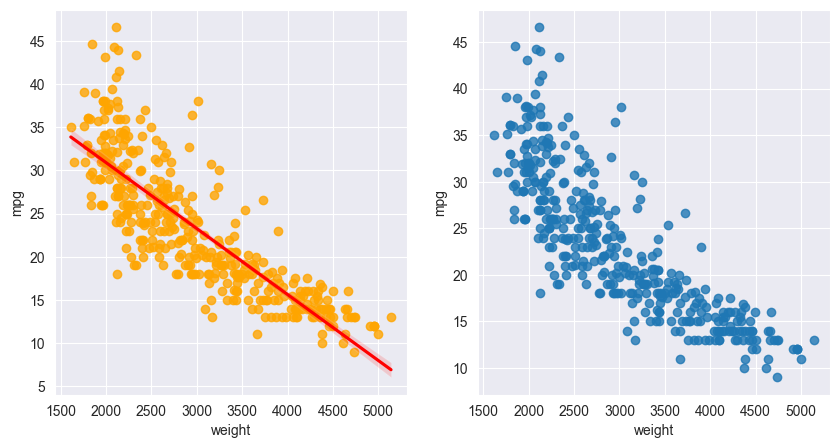

In [10]:
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'weight', y = 'mpg', data=ndf, ax = ax1, color='orange', line_kws={'color' : 'red'})
sns.regplot(x = 'weight', y = 'mpg', data=ndf, ax = ax2, fit_reg=False )
plt.show()

In [11]:
ndf.head()

,mpg,cylinders,HP,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


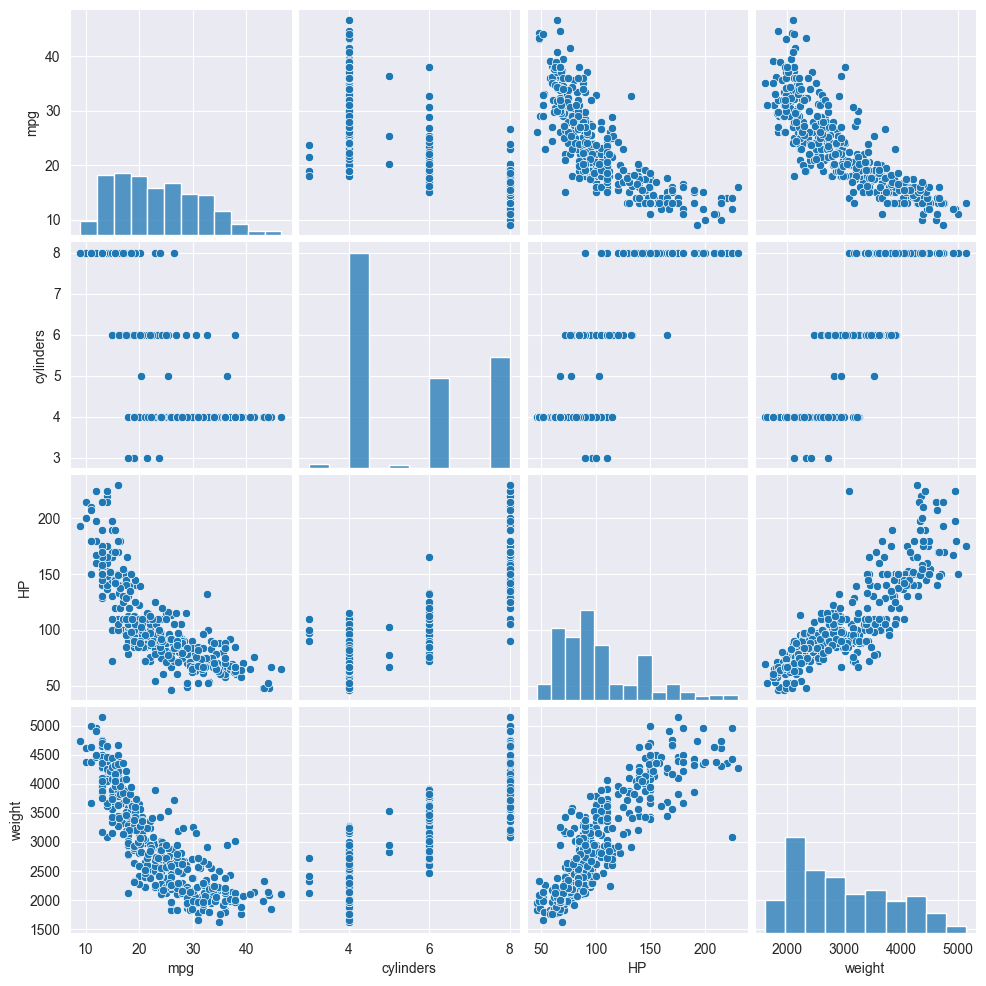

In [12]:
grid_ndf = sns.pairplot(ndf)
plt.show()

In [13]:
x = ndf[['weight']]
y = ndf[['mpg']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [16]:
print("train 데이터 개수 : ", len(x_train))
print("test 데이터 개수 : ", len(x_test))

train 데이터 개수 :  313
test 데이터 개수 :  79


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
r_square = lr.score(x_test, y_test)

In [21]:
r_square

0.6959884788265607

In [22]:
print('기울기 a : ', lr.coef_)
print("y절편 b : ", lr.intercept_)

기울기 a :  [[-0.00758599]]
y절편 b :  [46.1048919]


In [23]:
y_hat = lr.predict(x_train)

/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel pac

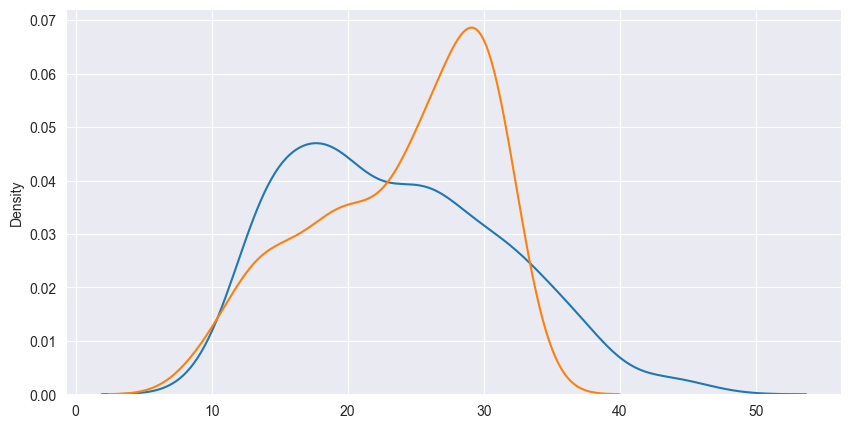

In [24]:
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist=False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')
plt.show()

In [25]:
x_train.shape

(313, 1)

In [26]:
x_test.shape

(79, 1)

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree = 2)

In [29]:
x_train_poly = poly.fit_transform(x_train)

In [30]:
x_train.shape

(313, 1)

In [31]:
x_train_poly.shape

(313, 3)

In [32]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

LinearRegression()

In [33]:
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)
print(r_square)

0.7199950574269517


In [34]:
y_hat_test = pr.predict(x_test_poly)

Text(0, 0.5, 'mpg')

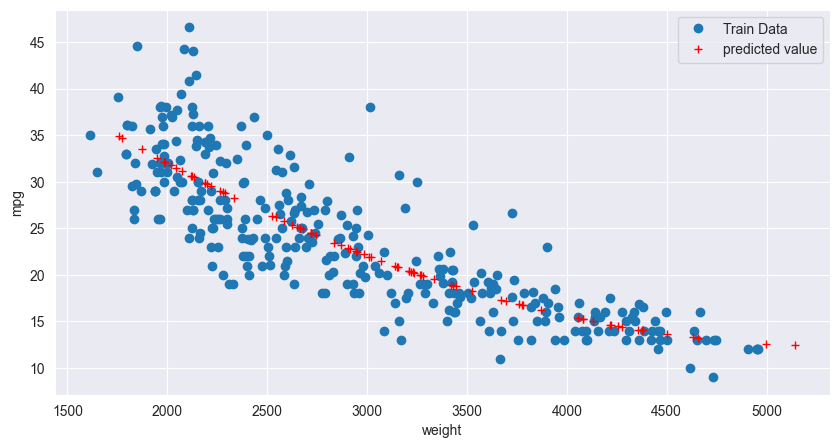

In [35]:
y_hat_test = pr.predict(x_test_poly)

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_train, y_train, 'o', label = 'Train Data')
ax.plot(x_test, y_hat_test, 'r+', label = 'predicted value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

In [36]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
r_square = lr.score(x_test, y_test)

In [40]:
r_square

0.6959884788265607

In [41]:
print('기울기 a : ', lr.coef_)
print("y절편 b : ", lr.intercept_)

기울기 a :  [[-0.00758599]]
y절편 b :  [46.1048919]


In [42]:
y_hat = lr.predict(x_train)

/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel pac

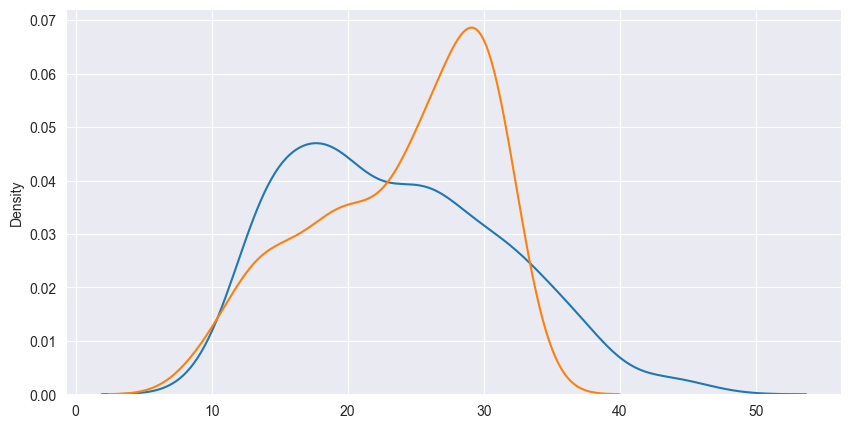

In [43]:
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist=False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')
plt.show()

In [44]:
x_train.shape

(313, 1)

In [45]:
x_test.shape

(79, 1)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree = 2)

In [48]:
x_train_poly = poly.fit_transform(x_train)

In [49]:
x_train.shape

(313, 1)

In [50]:
x_train_poly.shape

(313, 3)

In [51]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

LinearRegression()

In [52]:
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)
print(r_square)

0.7199950574269517


In [53]:
y_hat_test = pr.predict(x_test_poly)

Text(0, 0.5, 'mpg')

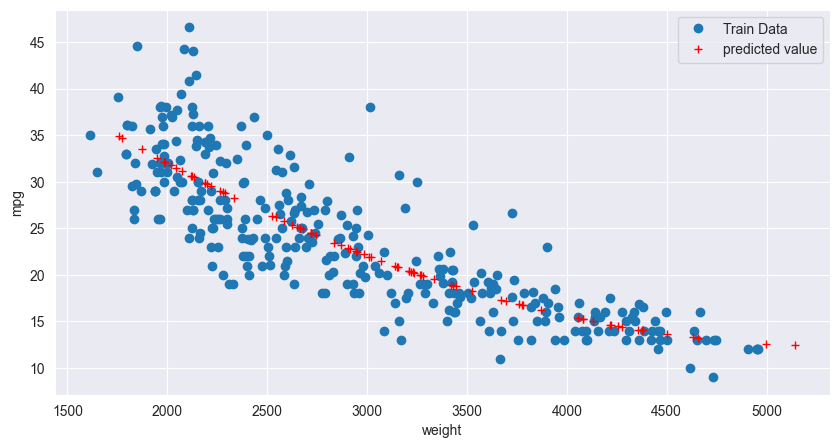

In [54]:
y_hat_test = pr.predict(x_test_poly)

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_train, y_train, 'o', label = 'Train Data')
ax.plot(x_test, y_hat_test, 'r+', label = 'predicted value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

In [55]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)